<a href="https://colab.research.google.com/github/jackysiupuichung/k-mean-clustering-for-colour-quantification/blob/main/KNN_quantify_colour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
from sklearn.cluster import KMeans

read image

In [19]:
img_arr = cv2.imread('/content/camping.webp')
print(img_arr.shape)

(300, 450, 3)


Visualise image

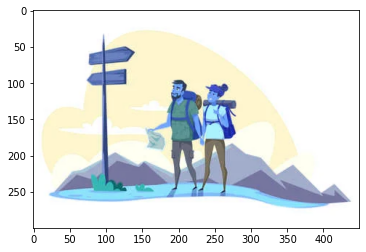

In [20]:
plt.imshow(img_arr)

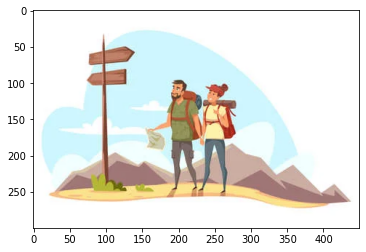

In [21]:
img_arr=cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
plt.imshow(img_arr)

Reshaping the image:

reshape to (height, width,3) with 3 being the 3 channels of RGB

In [22]:
(h,w,c) = img_arr.shape
img2D = img_arr.reshape(h*w,c)
print(img2D)
print(img2D.shape)

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(135000, 3)


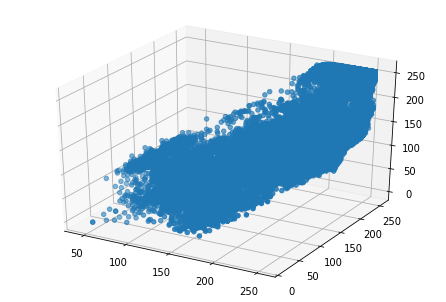

In [23]:
from mpl_toolkits.mplot3d import Axes3D

#get rgb values from image to 1D array
r, g, b = cv2.split(img_arr)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

Looping over to select the lowest elbow point based on inertia_

Inertia is calculated as the sum of squared distance for each point to its closest centroid

downside is that the as number of cluster incraese, less datapoints are within each cluster, thus inertia more than likely reduces => require maual adjustment

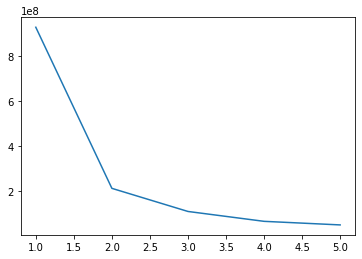

In [24]:
max_cluster = 6

md=[]
for i in range(1,max_cluster):
  kmeans=KMeans(n_clusters=i, random_state=42)
  kmeans.fit(img2D)
  o=kmeans.inertia_
  md.append(o)


plt.plot(list(np.arange(1,max_cluster)),md)
plt.show()

Define optimal_cluster based on elbow method manually

In [25]:
optimal_cluster = 4

Automatically Select lowest elbow point based on silhouette score

The Silhouette score is used to measure the degree of separation between clusters
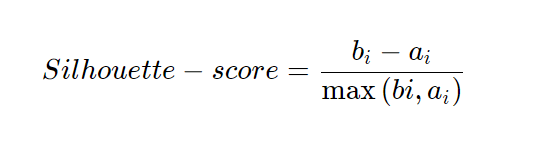

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

opt_sil = {}
for i in range(2,max_cluster):
    labels=KMeans(n_clusters=i).fit(img2D).labels_
    score = silhouette_score(img2D,labels,metric="euclidean",sample_size=1000,random_state=200)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(score))
    opt_sil[i] = score
    
optimal_cluster = max(opt_sil, key=opt_sil.get)
print("optimal k(clusters) = " + str(optimal_cluster))

Silhouette score for k(clusters) = 2 is 0.7845101191053508
Silhouette score for k(clusters) = 3 is 0.7633822541976145
Silhouette score for k(clusters) = 4 is 0.8198169983256607
Silhouette score for k(clusters) = 5 is 0.8029467902160606
optimal k(clusters) = 4


In [27]:
kmeans=KMeans(n_clusters=optimal_cluster)
kmeans_model = kmeans.fit(img2D)
labels=kmeans_model.labels_
#centroid = RGB value for the each cluster, shape (optimal_cluster, 3)
centroid=kmeans_model.cluster_centers_

In [28]:
print(centroid.astype(int))

[[253 254 254]
 [150 113  93]
 [223 192 152]
 [207 245 252]]


Visualise result: generate pie chart of primary colours

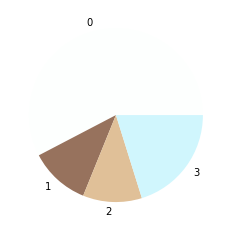

In [29]:
percent=[]
for i in range(len(list(centroid))):
  j=list(labels).count(i)
  j=j/(len(list(labels)))
  percent.append(j)
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

Visualise result: Segmentation

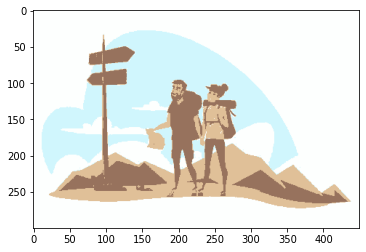

In [30]:
cluster_labels = kmeans_model.predict(img2D)
rgb_cols = kmeans_model.cluster_centers_.round(0).astype(int)
img_quant = np.reshape(rgb_cols[cluster_labels],(h,w,c))

plt.imshow(img_quant)

Text(0.5, 1.0, 'Color Quantized Image')

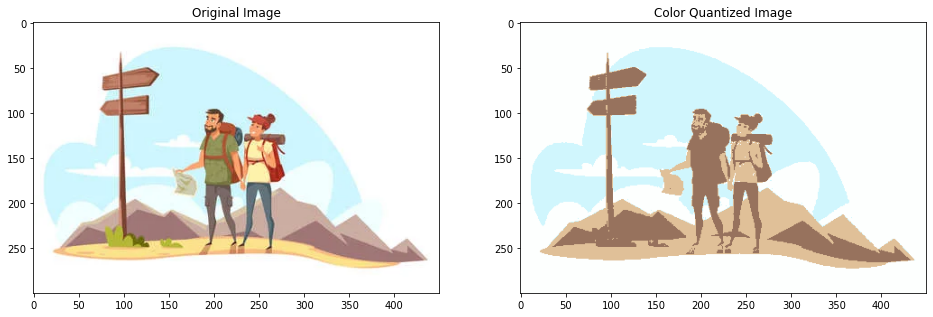

In [31]:
fig, ax = plt.subplots(1,2, figsize=(16,12))
ax[0].imshow(img_arr)
ax[0].set_title('Original Image')
ax[1].imshow(img_quant)
ax[1].set_title('Color Quantized Image')